In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from sklearn.preprocessing import scale
from sklearn.svm import SVC     # classification algorithm 1: support vector machine
from sklearn.neighbors import KNeighborsClassifier     # classification algorithm 2: k-nearest neighbours
from sklearn.model_selection import train_test_split
from tqdm import tqdm # a smart progress metre for looping

## Import data from the csv file

In [3]:
ImgDataFrame = pd.read_csv('Digit Recognizer/train.csv')

ImgDataFrame = ImgDataFrame.iloc[0:int(len(ImgDataFrame) / 2)] # reduce the size of raw dataset


In [4]:
labels = ImgDataFrame['label']
data = ImgDataFrame.iloc[:, 1:] # select columns except the first one

In [5]:
print(data.head())
print(data.iloc[0])
print(len(data))

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

## Split raw data to training and validation sets

In [6]:
train_data, validation_data, train_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 100)

# Selected Model: SVM with linear kernel 

In [7]:
svm_clf = SVC( kernel = 'linear', verbose = True)

In [8]:
svm_clf.fit(train_data, train_labels)

[LibSVM]

SVC(kernel='linear', verbose=True)

### accuracy 

In [18]:
print(svm_clf.score(validation_data, validation_labels))

0.9040476190476191


## Predict testing data

In [11]:
test_data = pd.read_csv('Digit Recognizer/test.csv')
predict_labels = svm_clf.predict(test_data)

## Converse data types

In [14]:
print(type(test_data)) # pandas dataframe
print(type(predict_labels)) # numpy array

idx_df = pd.DataFrame({'ImageId': range(1, len(test_data) + 1)}) # ImageId
predict_labels = pd.DataFrame({'Label': predict_labels})
print(type(predict_labels))
print(predict_labels.head())
predict_label_pixels = predict_labels.join(test_data) # Combine 2 dataframes as one!
ImgId_Labels = idx_df.join(predict_labels)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
   Label
0      2
1      0
2      9
3      4
4      3


In [12]:
print(predict_labels.iloc[3])

Label    4
Name: 3, dtype: int64


## Export the result dataframe to my PC folder

In [15]:
predict_label_pixels.to_csv(r'test_data_labels_SVM_linear.csv', index = False)
ImgId_Labels.to_csv(r'My_submission_SVM_linear.csv', index = False)

## Data Visualisation

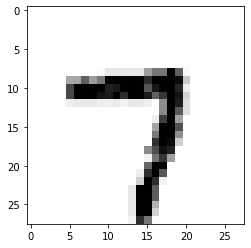

[15033, 9565, 27252, 5114, 8963, 5921, 9616, 26538, 18035, 5633, 14102, 816, 12976, 23825, 13128, 25704]
15033
9565
27252
5114
8963
5921
9616
26538
18035
5633
14102
816
12976
23825
13128
25704


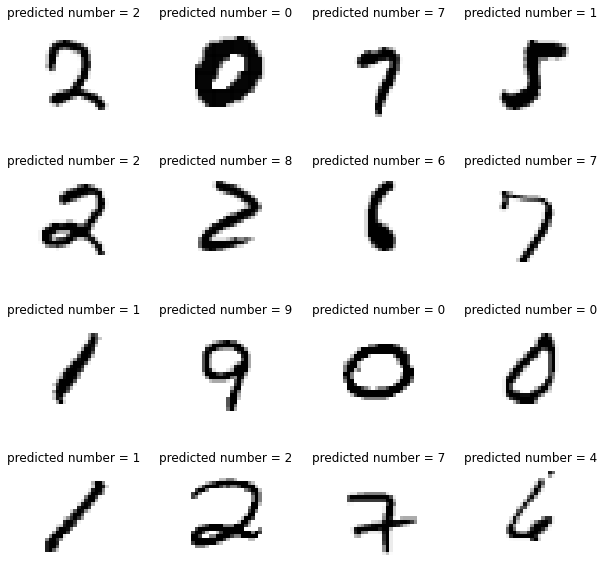

In [17]:
data_npArr = np.array(data.iloc[rd.randint(0,len(data)),:])
plt.imshow(data_npArr.reshape(28,28), cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

# pick N images from testing dataset at random
k = 4
N = k ** 2 
randIndices = []
for idx in range(N):
    randIndices.append(rd.randint(0, len(test_data)))

print(randIndices)

fig, ax = plt.subplots(k, k, sharex = False, sharey = False, figsize = (10, 10))
# sharex-> share the same x-axis or not  sharey->share the same y-axis or not

fig.subplots_adjust(wspace = .5, hspace = .5)
fig.savefig('Classificaiton Results Using SVM with a Linear Kernel.jpg')

for i in range(k):
    for j in range(k):
        randIdx = randIndices[i * k + j]
        print(randIdx)
        test_data_npArr = np.array(test_data.iloc[randIdx, :])
        ax[i][j].imshow(test_data_npArr.reshape(28,28), cmap = plt.cm.gray_r, interpolation = 'nearest')
        ax[i][j].set_title('predicted number = ' + str(predict_labels.iloc[randIdx]['Label']))
        ax[i][j].axis('off')

plt.show()
fig.savefig('Classification results using SVM with linear kernel.jpg')

# Selected Model: KNN classifier

In [19]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(train_data, train_labels)
print("Validation accuracy = %.3f" %knn_clf.score(validation_data, validation_labels))

Validation accuracy = 0.964


## Choose different k's

In [20]:
accuracy_dict = {}
k_list = range(1, 101)
for k in k_list:
  knn_clf = KNeighborsClassifier(n_neighbors = k)
  knn_clf.fit(train_data, train_labels)
  accuracy_dict[k] = knn_clf.score(validation_data, validation_labels)
  print("Validation accuracy = %.3f" %knn_clf.score(validation_data, validation_labels))

k_for_AccuracyMax = max(accuracy_dict, key = accuracy_dict.get) 
print("When k = %d, we have the best validation accuracy ever!" %k_for_AccuracyMax)

Validation accuracy = 0.958
Validation accuracy = 0.954
Validation accuracy = 0.964
Validation accuracy = 0.963


KeyboardInterrupt: 

### Graph the results

In [ ]:
accuracies = [accuracy_dict[k] for k in k_list]
plt.plot(k_list, accuracies, color = 'blue')
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()
